Importing TensorFlow

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.2'

Importing Dataset Library

In [3]:
!pip install emnist
import emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

Extracting 62 class data which has every digit from 0 to 9 and capital and small versions of all english letters

In [5]:
from emnist import extract_training_samples
images, labels = extract_training_samples('byclass')

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

First image in the dataset

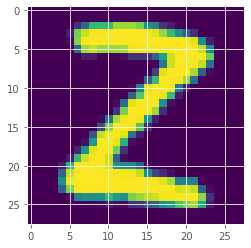

In [7]:
plt.imshow(images[0])
plt.show()

In [8]:
labels[0]

35

In [9]:
n_classes = len(set(labels))      # No of total classes
n_classes

62

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

One-Hot encoding the class labels from 0 to 61 (inclusive)

In [11]:
labels = to_categorical(labels)

In [12]:
import numpy as np

In [13]:
np.shape(labels[0])

(62,)

Splitting the dataset into train and test

In [14]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = 7)

In [15]:
print(np.shape(train_images),
np.shape(test_images),'\n',
np.shape(train_labels),
np.shape(test_labels))

(558345, 28, 28) (139587, 28, 28) 
 (558345, 62) (139587, 62)


First train dataset image

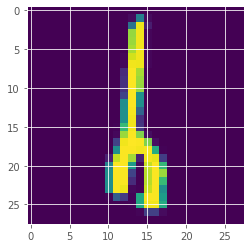

In [16]:
plt.imshow(train_images[0])
plt.show()

In [17]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))

Standardizing train and test images

In [19]:
img_mean = np.mean(train_images)
img_std = np.std(train_images)
train_images = (train_images-img_mean)/img_std
test_images = (test_images-img_mean)/img_std

In [20]:
np.shape(train_images)

(558345, 784)

Training the network

In [21]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Network Framework

In [22]:
ANN = Sequential()
ANN.add(Dense(units = 64, activation = 'relu', use_bias = True))
ANN.add(Dense(units = 64, activation = 'relu'))
ANN.add(Dense(units = n_classes, activation = 'softmax'))

In [23]:
ANN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Training the network

In [24]:
ANN.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
17449/17449 [==============================] - 44s 2ms/step - loss: 0.7438 - accuracy: 0.7660
Epoch 2/5
17449/17449 [==============================] - 37s 2ms/step - loss: 0.5874 - accuracy: 0.8049
Epoch 3/5
17449/17449 [==============================] - 38s 2ms/step - loss: 0.5622 - accuracy: 0.8109
Epoch 4/5
17449/17449 [==============================] - 37s 2ms/step - loss: 0.5490 - accuracy: 0.8147
Epoch 5/5
17449/17449 [==============================] - 37s 2ms/step - loss: 0.5414 - accuracy: 0.8166


Evaluating the network on the test dataset

In [25]:
loss, accuracy = ANN.evaluate(test_images, test_labels)

4363/4363 [==============================] - 7s 1ms/step - loss: 0.5593 - accuracy: 0.8133


Obtaining label predictions

In [26]:
pred_labels = ANN.predict(test_images)

In [27]:
np.shape(pred_labels)

(139587, 62)

In [28]:
start_ind = 0

Class Dictionary for referencing class labels and obtaining corresponding character

In [29]:
class_dic = {}
for i in range(10):
  class_dic[i] = i
for i in range(26):
  class_dic[10+i] = chr(65+i)
  class_dic[10+26+i] = chr(97+i)

Plotting 25 images from 'start_ind' and comparing their predictions

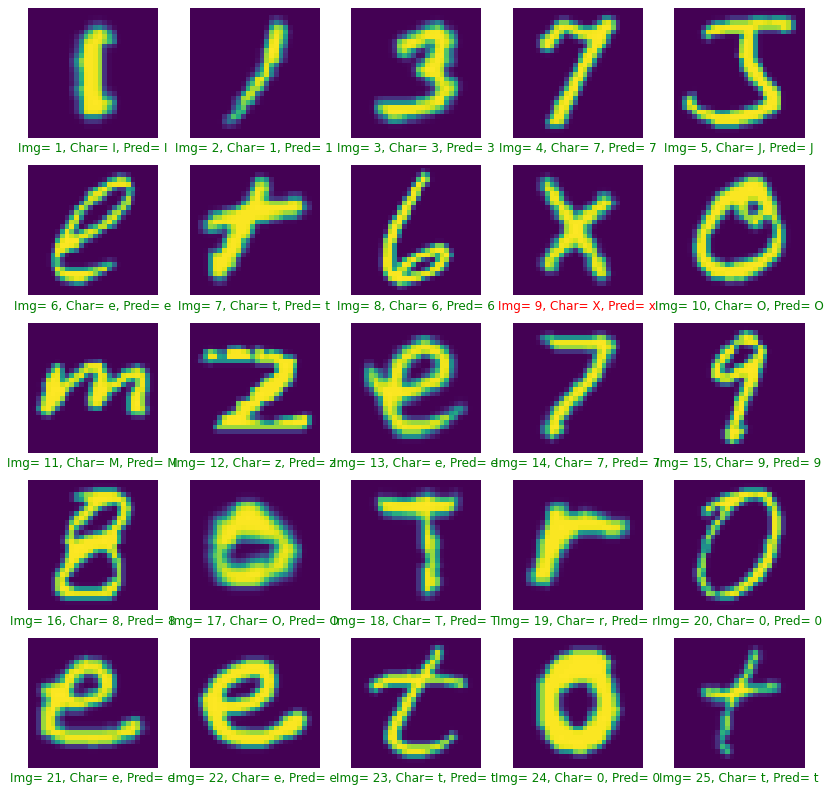

In [30]:
plt.figure(figsize = (14, 14))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  pred = np.argmax(pred_labels[start_ind+i])
  real_val = np.argmax(test_labels[start_ind+i])

  col = 'g'
  if pred != real_val:
    col = 'r'
  
  plt.xlabel("Img= {}, Char= {}, Pred= {}".format(i+start_ind+1, class_dic[real_val], class_dic[pred]), color = col)
  plt.imshow(test_images[start_ind+i].reshape((28,28)))
  
plt.show()